In [27]:
import os
import detect
import cv2
from PIL import Image
import numpy as np

In [32]:
def get_padding(image):
    image_copy = image.copy()
    height, width = image_copy.shape[:2]
    gray = cv2.cvtColor(image_copy,cv2.COLOR_BGR2GRAY)
    contour, c_img = detect.outer_contours(gray, image_copy, color=(255,0,0))

    x_min, x_max = min([i[0][0] for i in contour]), max([i[0][0] for i in contour])
    y_min, y_max = min([i[0][1] for i in contour]), max([i[0][1] for i in contour])

    padding_top, padding_left, padding_right, padding_bottom = y_min, x_min, width-x_max, height-y_max

    return [padding_top, padding_left, padding_right, padding_bottom]

In [28]:
def get_contour_size(image):
    image_copy = image.copy()
    gray = cv2.cvtColor(image_copy,cv2.COLOR_BGR2GRAY)
    contour, c_img = detect.outer_contours(gray, image_copy, color=(255,0,0))

    x_min, x_max = min([i[0][0] for i in contour]), max([i[0][0] for i in contour])
    y_min, y_max = min([i[0][1] for i in contour]), max([i[0][1] for i in contour])

    return [x_max-x_min, y_max-y_min]

In [29]:
def resize_with_padding(img, scale_percent=60):
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)

    resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

    background = np.ones_like(img) * 255  # 모든 픽셀을 흰색으로 설정합니다.

    center_x = (img.shape[1] - width) // 2
    center_y = (img.shape[0] - height) // 2

    # 배경 이미지 위에 리사이즈된 이미지를 붙입니다.
    background[center_y:center_y+height, center_x:center_x+width] = resized

    return background

x : 825 / y : 332
default_size ; [599.95, 540.8000000000001]


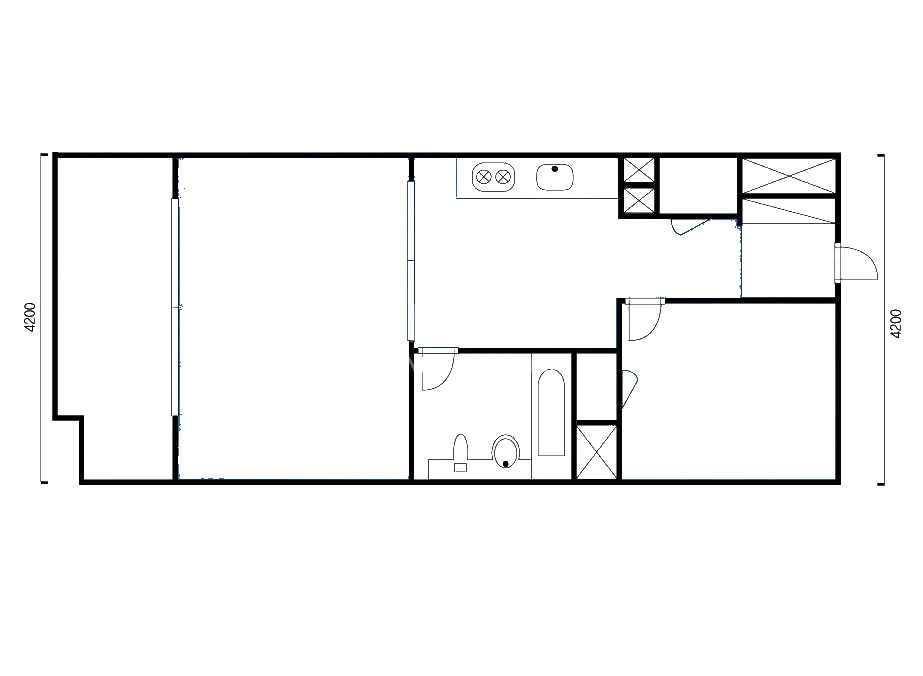

72.72121212121213
0.7272121212121213 1.6289156626506027


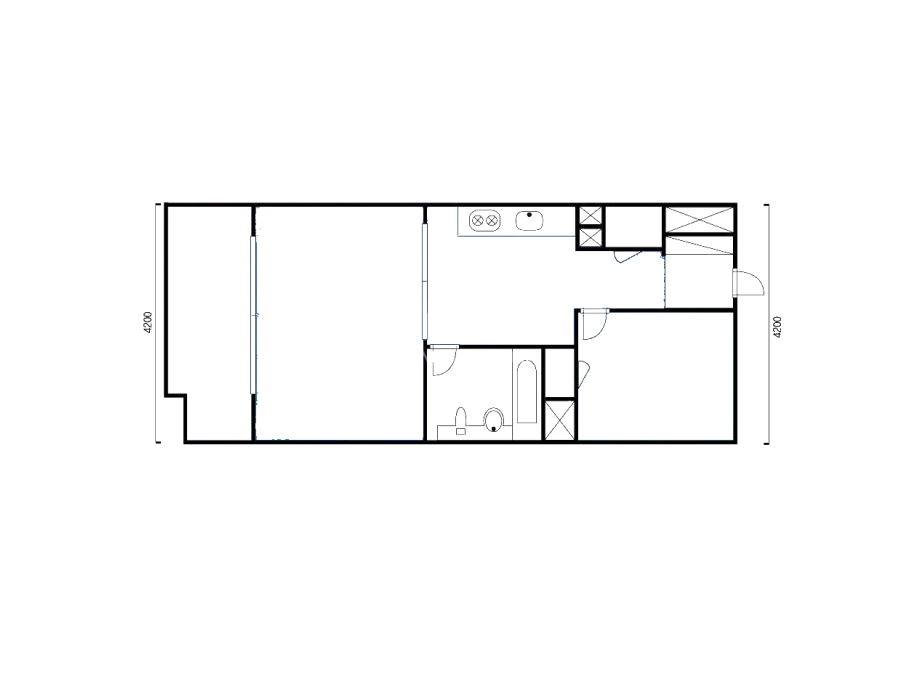

top : 202 / left : 163 / right : 159 / bottom : 232


In [42]:
path = '20231021_first_output_img'
img_list = os.listdir(path)

file_path = f'{path}/{img_list[180]}'
img = cv2.imread(file_path)

contour_size = get_contour_size(img)
print(f'x : {contour_size[0]} / y : {contour_size[1]}')


height, width = img.shape[:2]
default_size = [width*0.65, height*0.8]
print(f'default_size ; {default_size}')
# default_size = [600, 536]

display(Image.fromarray(img))
if default_size[0] < contour_size[0] or default_size[1] < contour_size[1]:
    ratio = min([default_size[0] / contour_size[0], default_size[1] / contour_size[1]])*100
    print(ratio)
    print(default_size[0] / contour_size[0], default_size[1] / contour_size[1])

    resize_img = resize_with_padding(img, scale_percent=ratio)
    display(Image.fromarray(resize_img))

    padding_T_L_R_B = get_padding(resize_img)
    print(f'top : {padding_T_L_R_B[0]} / left : {padding_T_L_R_B[1]} / right : {padding_T_L_R_B[2]} / bottom : {padding_T_L_R_B[3]}')
